DataSet:
* Rain Prediction

In [2]:
!python --version

Python 3.11.7


# **1. import Libraries/Dataset**

## 1.1. Download the dataset
Upload a required data (CSV) file to the colab file systems.

In [ ]:
from google.colab import files
uploaded = files.upload()

## 1.2. Import the required libraries

In [3]:
#!pip install category_encoders
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Dropout
from keras.models import Sequential
from sklearn.metrics import confusion_matrix, classification_report
from keras import callbacks
import warnings
warnings.filterwarnings('ignore')


# **2. Data Visualization and Exploration**

Read the uploaded 'weatherAUS.csv' as dataframe

In [4]:
df = pd.read_csv('weatherAUS.csv')

# 2.1. Print 10 rows
sanity check to identify all the features present in the dataset and if the target matches with them.

In [5]:
df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


Represents the number of rows and columns respectively.

In [6]:
df.shape

(145460, 23)

There are 23 columns with 145K rows

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

There are 16 numberic type columns and 7 object (categorical) type columns

The data from "Date" column should be Date type

In [8]:
df['Date'] = pd.to_datetime(df['Date'])

Checking for null values in the dataset

In [9]:
(df.isnull().sum()/len(df) *100).sort_values(ascending=False)

Sunshine         48.009762
Evaporation      43.166506
Cloud3pm         40.807095
Cloud9am         38.421559
Pressure9am      10.356799
Pressure3pm      10.331363
WindDir9am        7.263853
WindGustDir       7.098859
WindGustSpeed     7.055548
Humidity3pm       3.098446
WindDir3pm        2.906641
Temp3pm           2.481094
RainTomorrow      2.245978
Rainfall          2.241853
RainToday         2.241853
WindSpeed3pm      2.105046
Humidity9am       1.824557
Temp9am           1.214767
WindSpeed9am      1.214767
MinTemp           1.020899
MaxTemp           0.866905
Location          0.000000
Date              0.000000
dtype: float64

Filling the null values of the categorical columns with the mode

In [10]:
objDF = (df.dtypes == "object")
categoricalIdx = list(objDF[objDF].index)
# Filling missing values with mode of the column in value
for idx in categoricalIdx:
    df[idx].fillna(df[idx].mode()[0], inplace=True)

Filling the null values of the numerical columns with the median becuse we do not if the features are skewed or not

In [11]:
numDF = (df.dtypes == "float64")
numericalIdx = list(numDF[numDF].index)
# Filling missing values with median of the column in value
for idx in numericalIdx:
    df[idx].fillna(df[idx].median(), inplace=True)


Checking again for null values in the dataset

In [13]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

There is no NULL after the null values are all replaced with appropriate values.

# 2.2. Apply Univariate analysis with target variables.

Creating new dataframe for numerical and categorical variables

In [14]:
numericalDF = df.select_dtypes(np.number)
categoricalDF = df.select_dtypes('object')

Apply Univariate analysis for numericals columns

MinTemp :


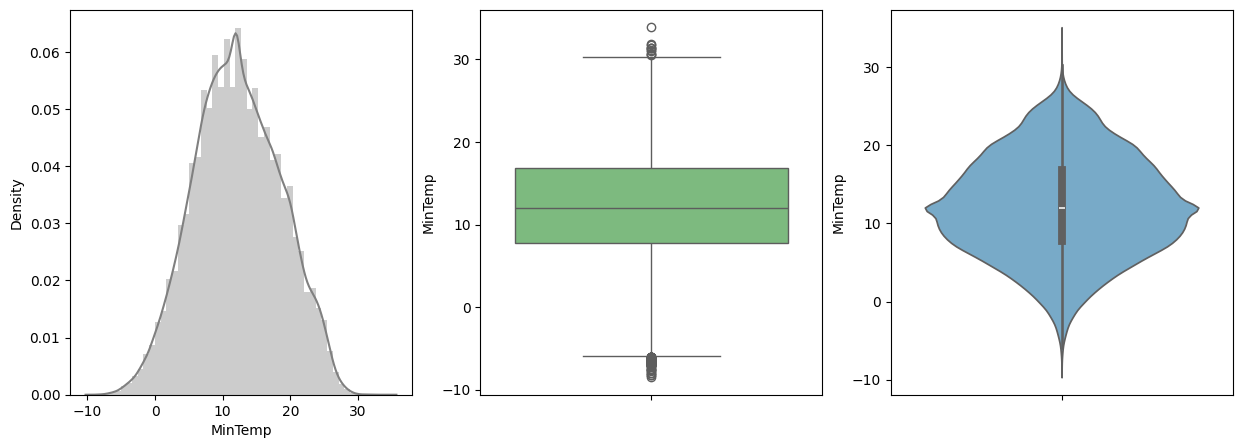

MaxTemp :


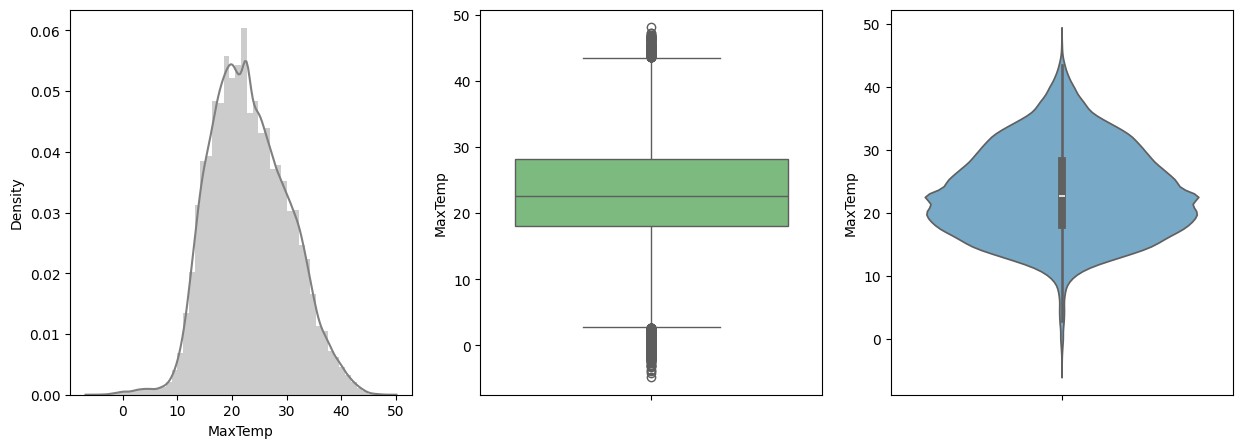

Rainfall :


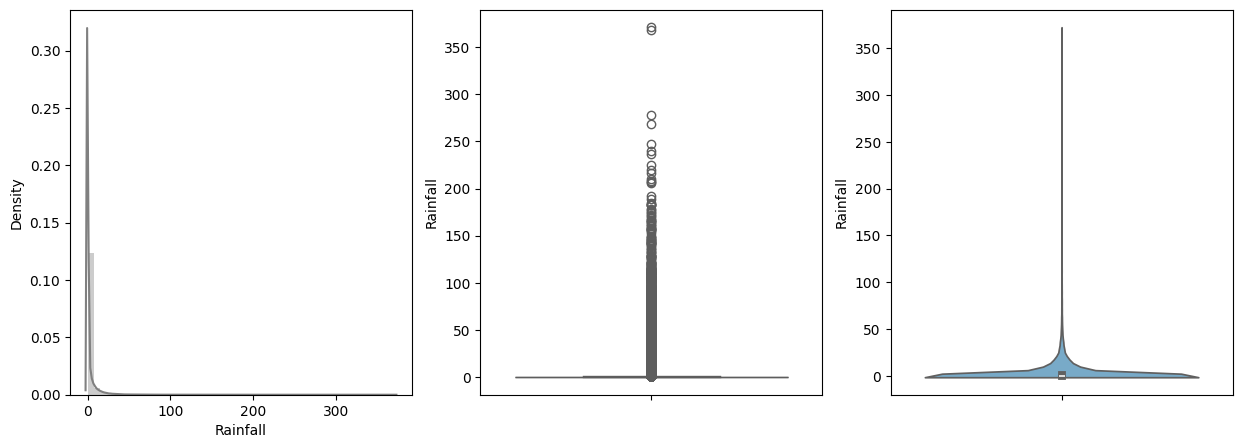

Evaporation :


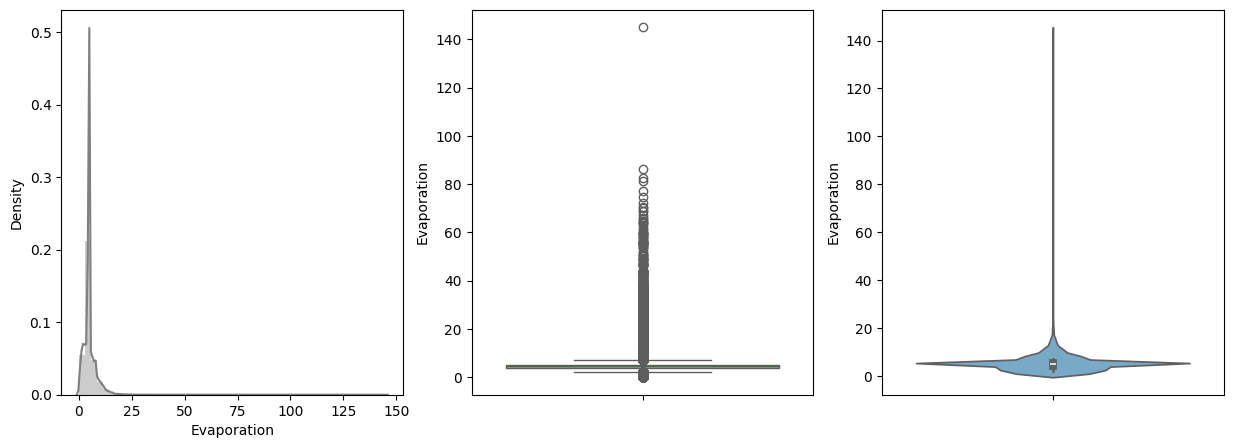

Sunshine :


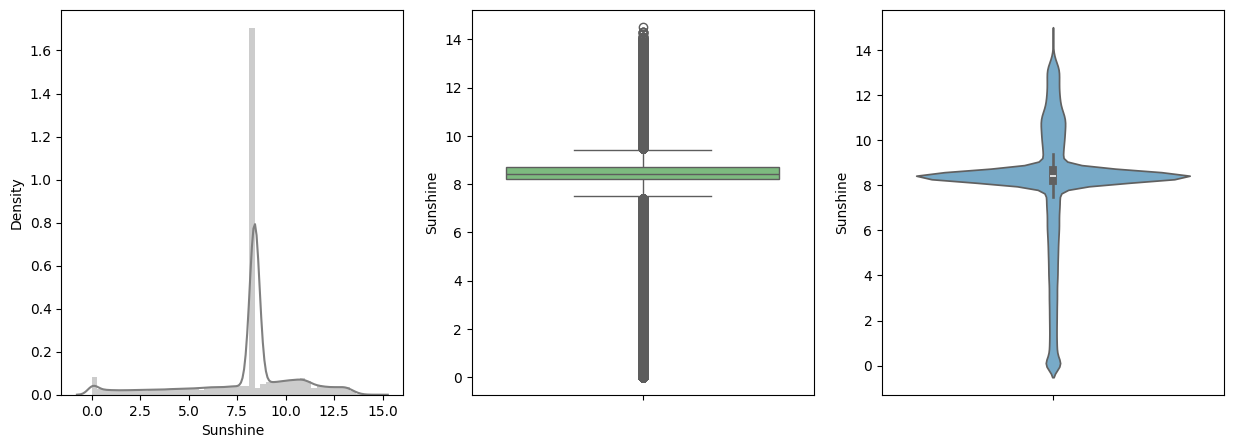

WindGustSpeed :


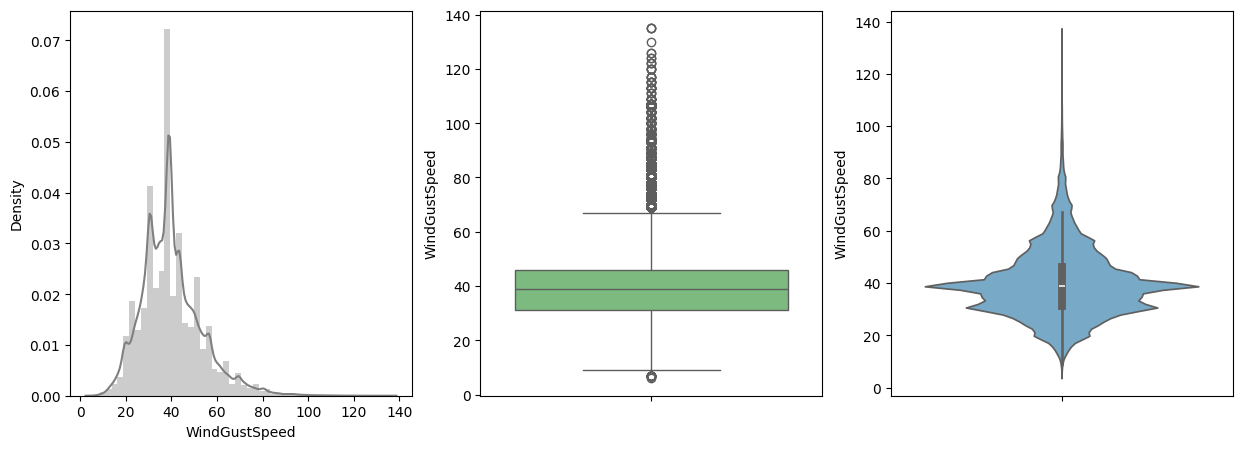

WindSpeed9am :


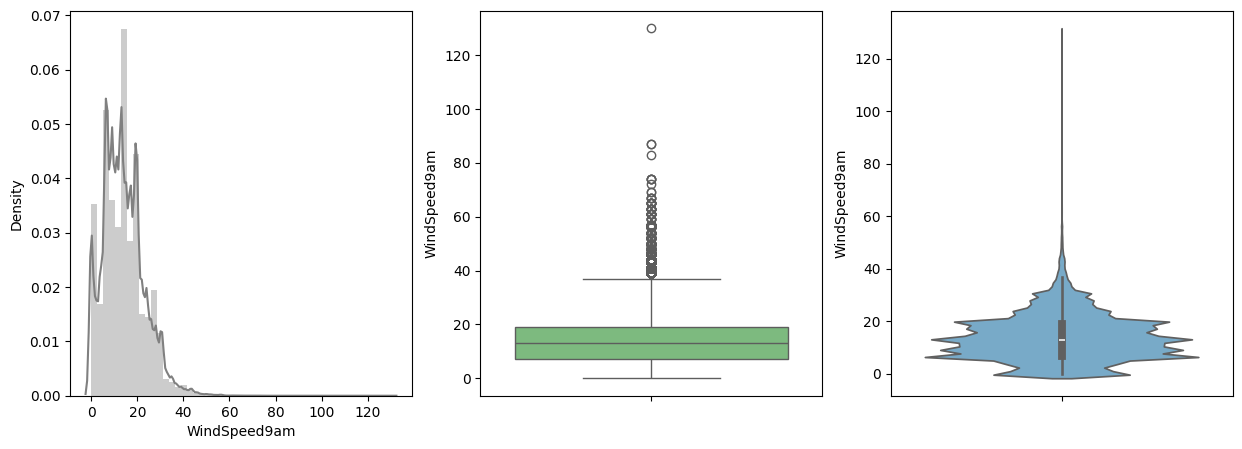

WindSpeed3pm :


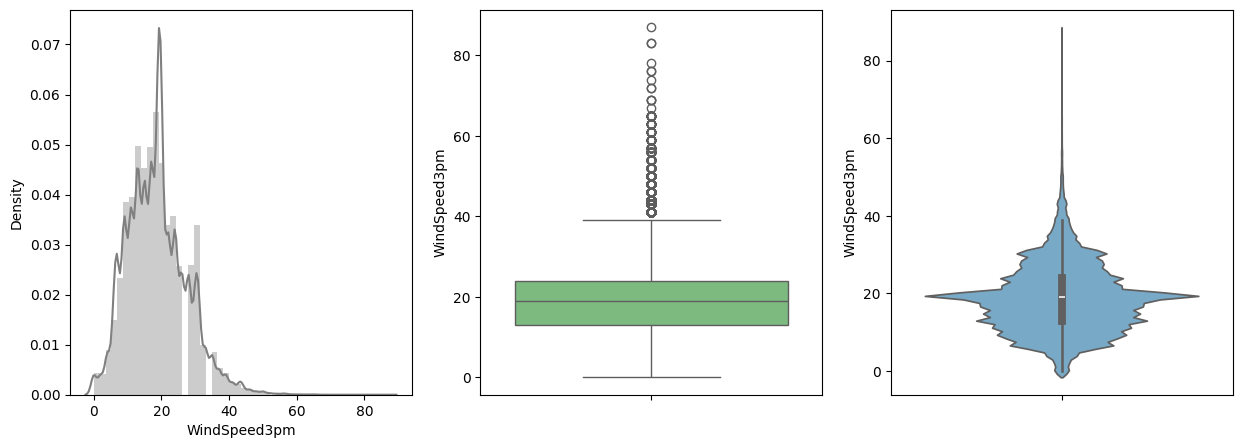

Humidity9am :


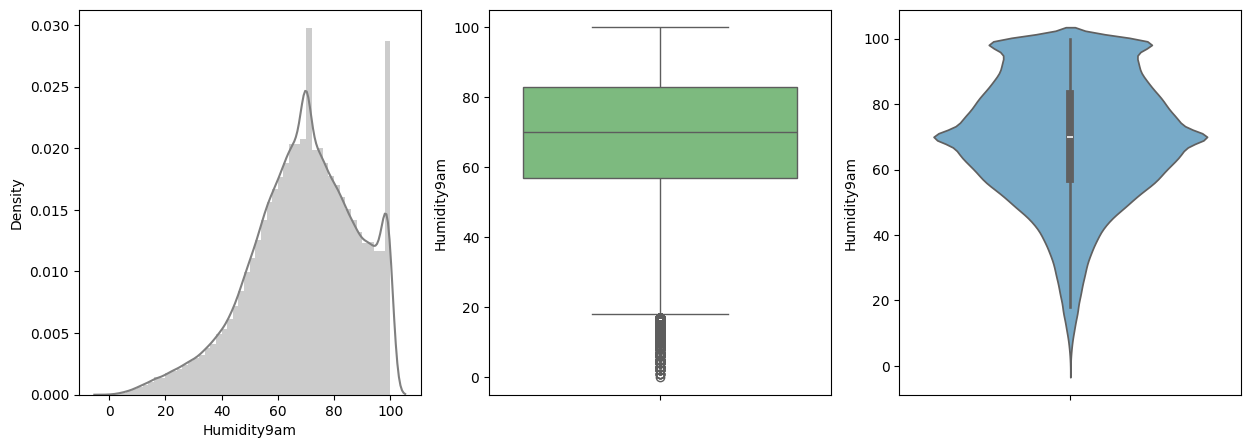

Humidity3pm :


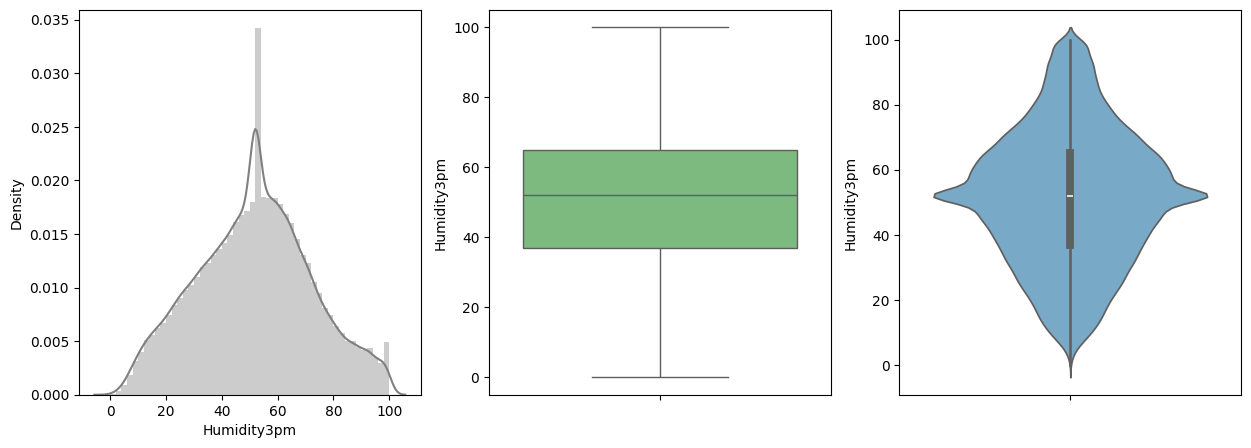

Pressure9am :


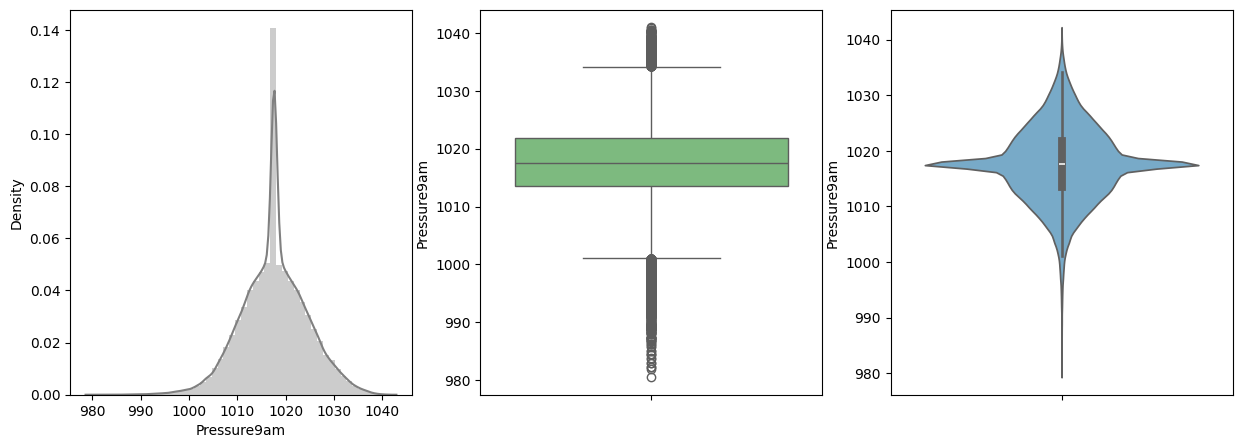

Pressure3pm :


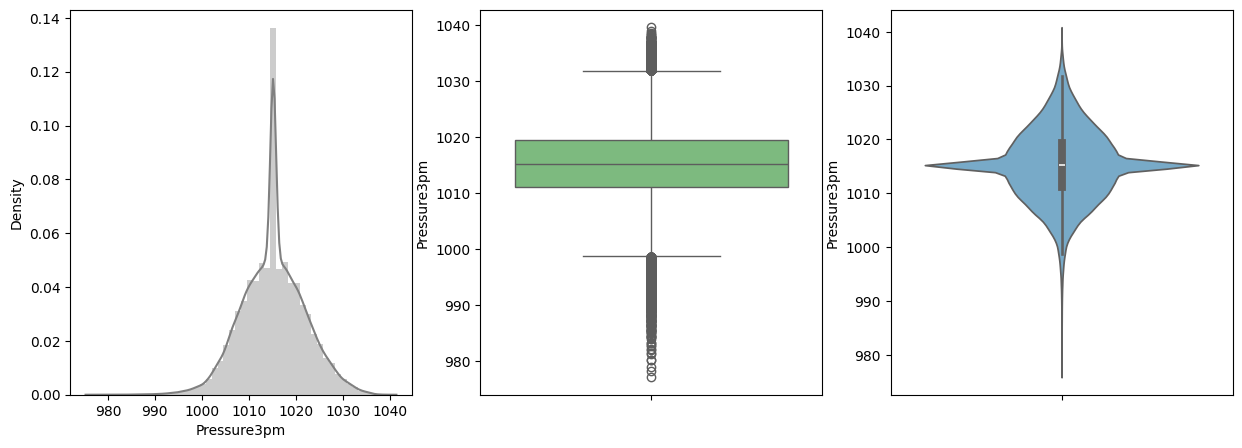

Cloud9am :


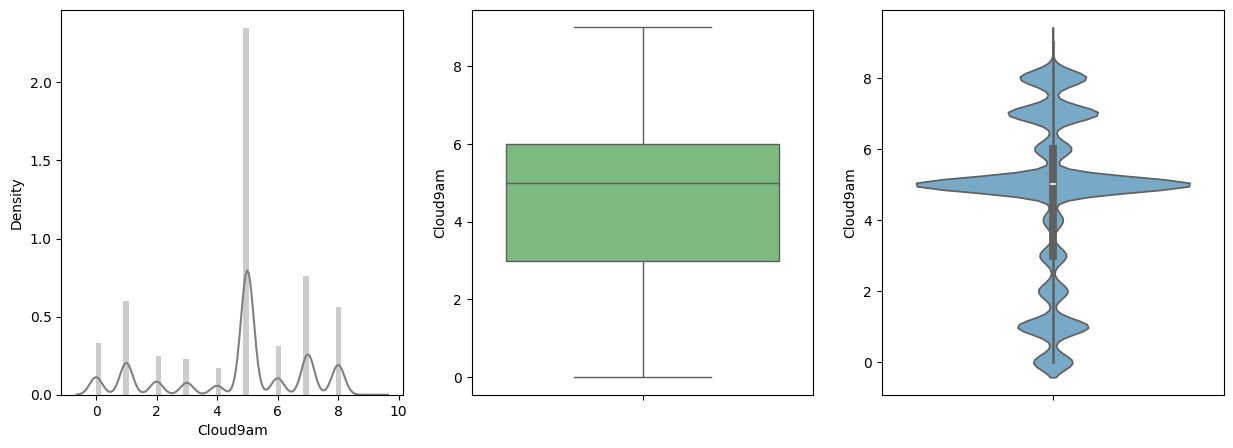

Cloud3pm :


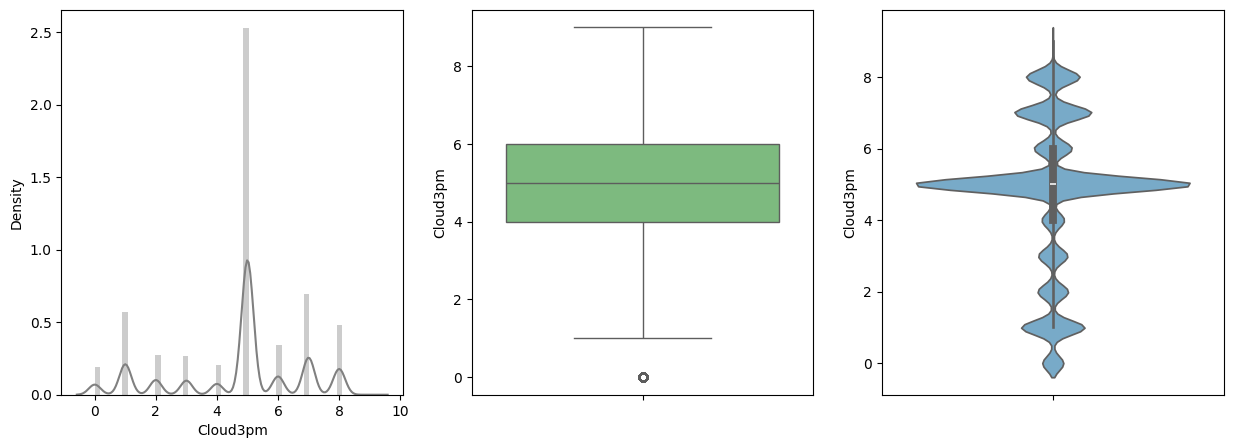

Temp9am :


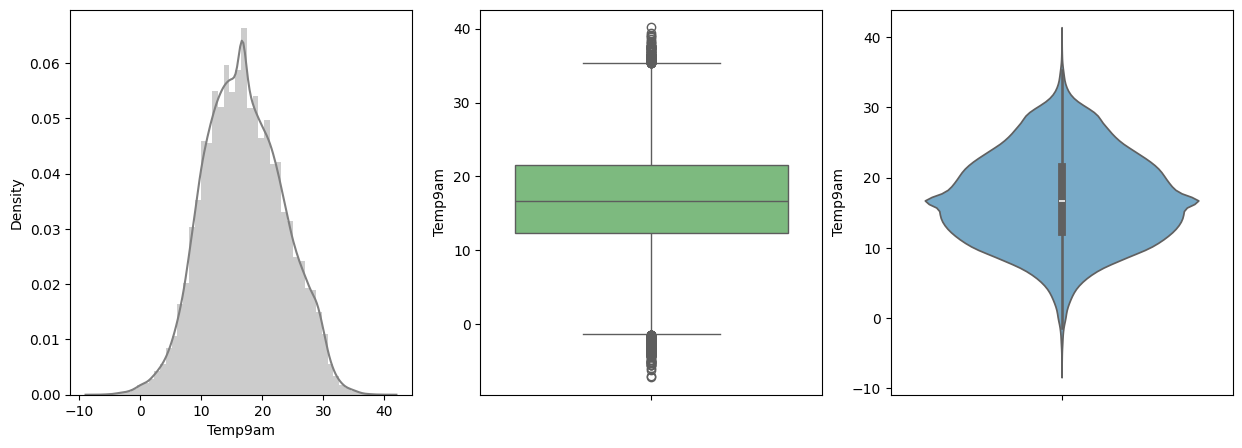

Temp3pm :


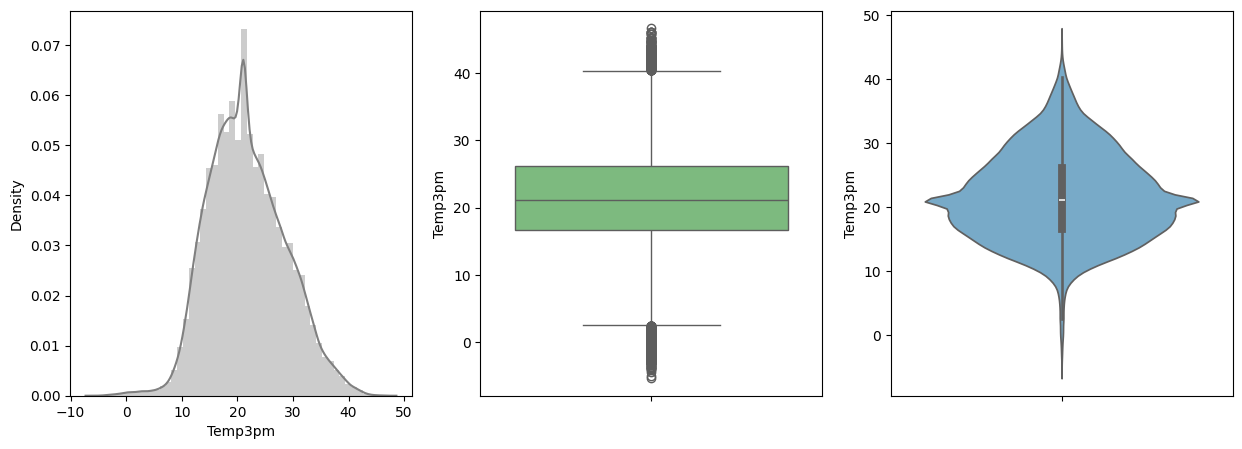

In [15]:
plt.rcParams['figure.figsize'] = 15,5
for col in df.select_dtypes(np.number):
    fig,ax= plt.subplots(1,3)
    print(col,':')
    sns.distplot(numericalDF[col],ax=ax[0], color='gray')
    sns.boxplot(numericalDF[col], ax=ax[1], palette='Greens')
    sns.violinplot(numericalDF[col],ax=ax[2], palette='Blues')
    plt.show()

**Inferences from the univariate analysis of the numerical columns:**
* *mintemp* follows a normal distribution 
with outliers in both sides
* *maxtemp* is left skewed more than right skewed
* *Rainfall* is right skewed, whenever there is rain, it is having higher values
* *Evaporation* is highly right skewed similar to rainfall
* *Sunshine* has outliers on both sides, which means there were only less days when the sunshine was warm, many days it was cloudy and equally many days it was a sunshiny day.
* *Windgustspeed* is right skewed, as only on rainy days the *windgustspeed* was very high
* *Windspeed9am* and *Windspeed3pm* are right skewed too
* *Humidity9am* is left skewed 
* *Humidity3pm* is normally distributed.
* *Pressure9am* has outliers in both sides and same applies for *Pressure3pm*, the pressure is either too less or too high on rainy days
* *Cloud9am* and *Cloud3pm* follows almost normal distribution
* *Temp9am* and *Temp3pm* follows similar distribution with outliers on both sides

Apply Univariate analysis for categorical columns

Location :


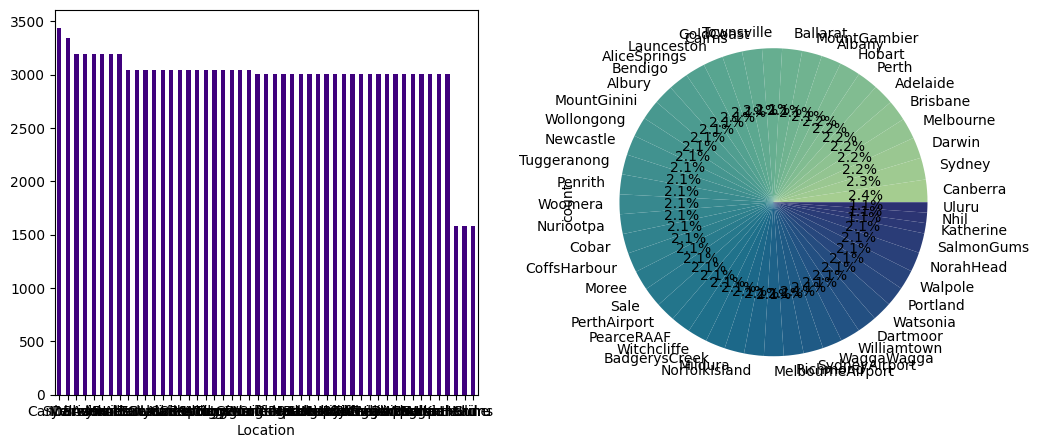

WindGustDir :


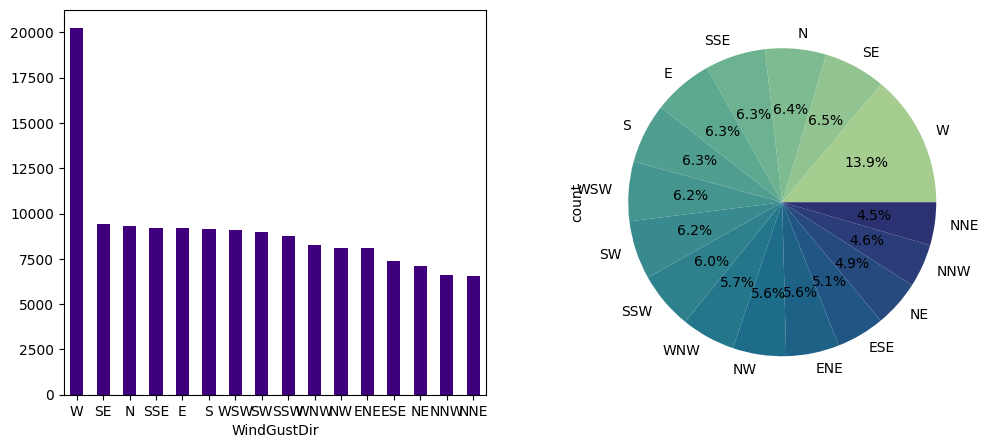

WindDir9am :


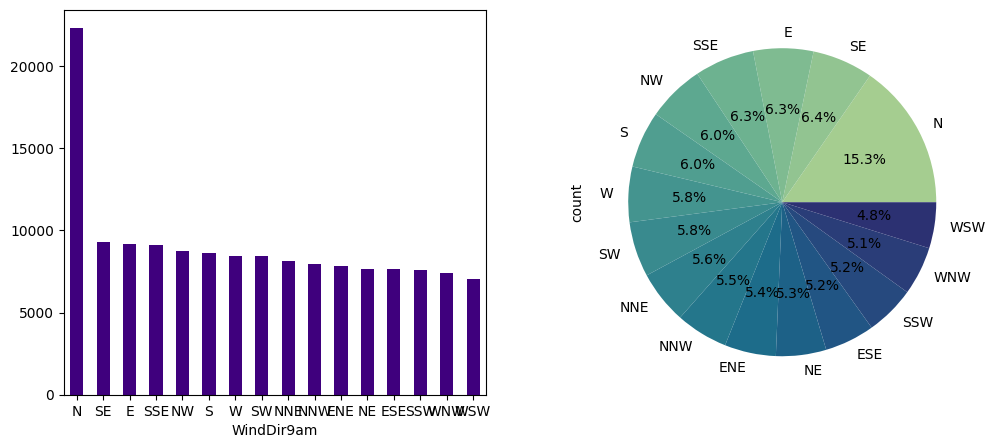

WindDir3pm :


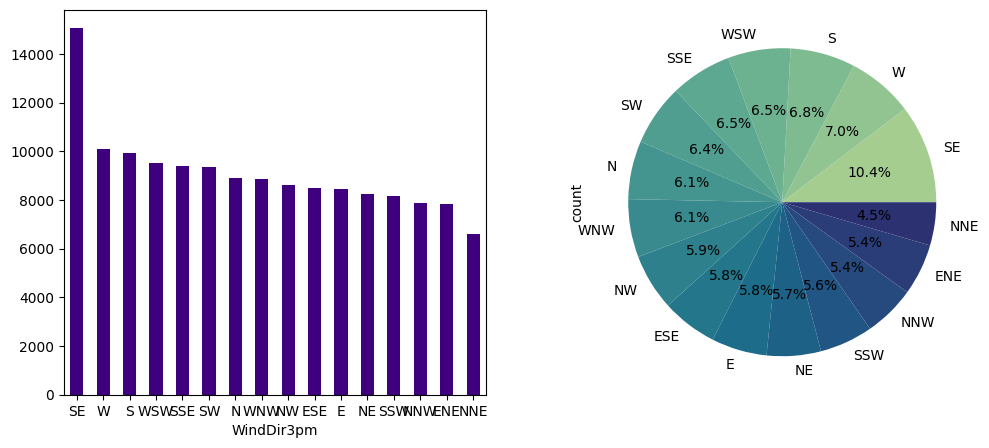

RainToday :


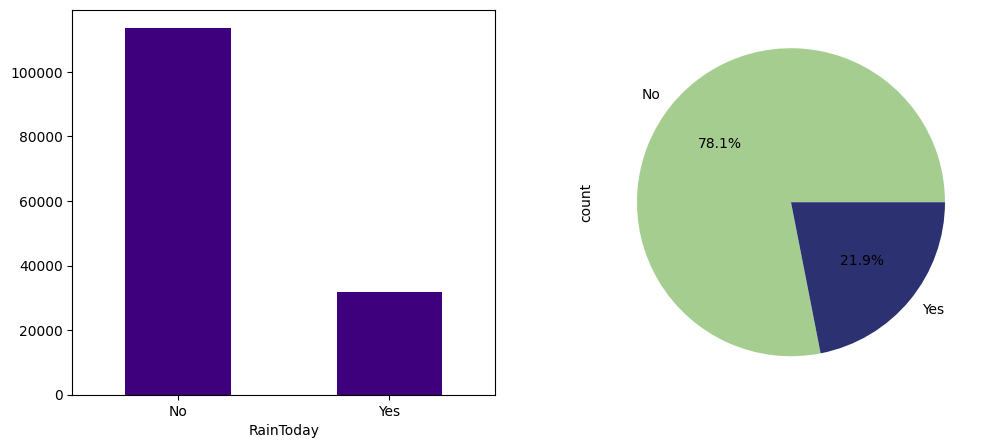

RainTomorrow :


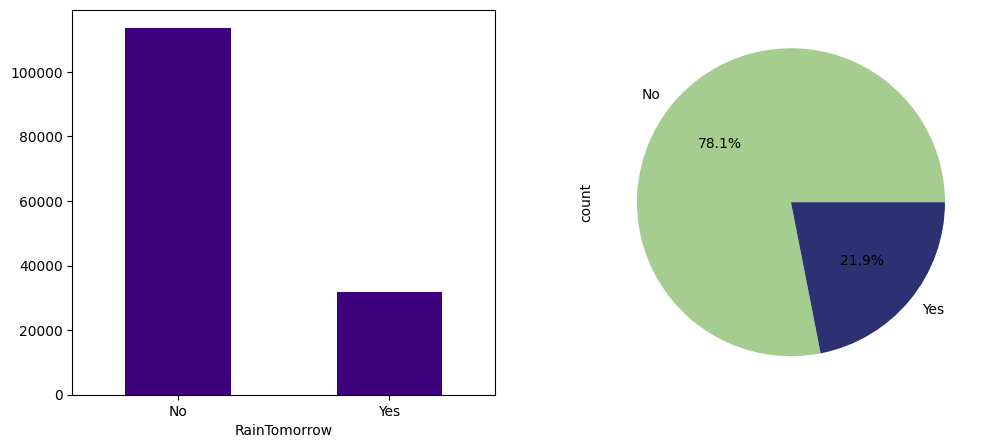

In [16]:
plt.rcParams['figure.figsize'] = 12,5
for col in categoricalDF:
    fig ,ax = plt.subplots(1,2)
    print(col,':')
    categoricalDF[col].value_counts().plot(kind='bar',rot=0, ax=ax[0],cmap='Purples_r')
    categoricalDF[col].value_counts().plot(kind='pie',autopct='%.1f%%',ax=ax[1],cmap='crest')
    plt.show()

**Inferences from the univariate analysis of the Categorical columns**
* *Location* category almost all the locations contribute to the dataset equally
* *Windgustdir* is more from the West direction compared to all the other directions
* *Winddir9am* is more from the North direction compared to all the other directions
* *Winddir3pm* is more from the South-East direction followed almost equally by West and South directions
* Most of the days there was no rain only 22% times of the days, rain occurred.

## 2.3. Print each class label count and create charts  for each class (% of data distribution).

Location :


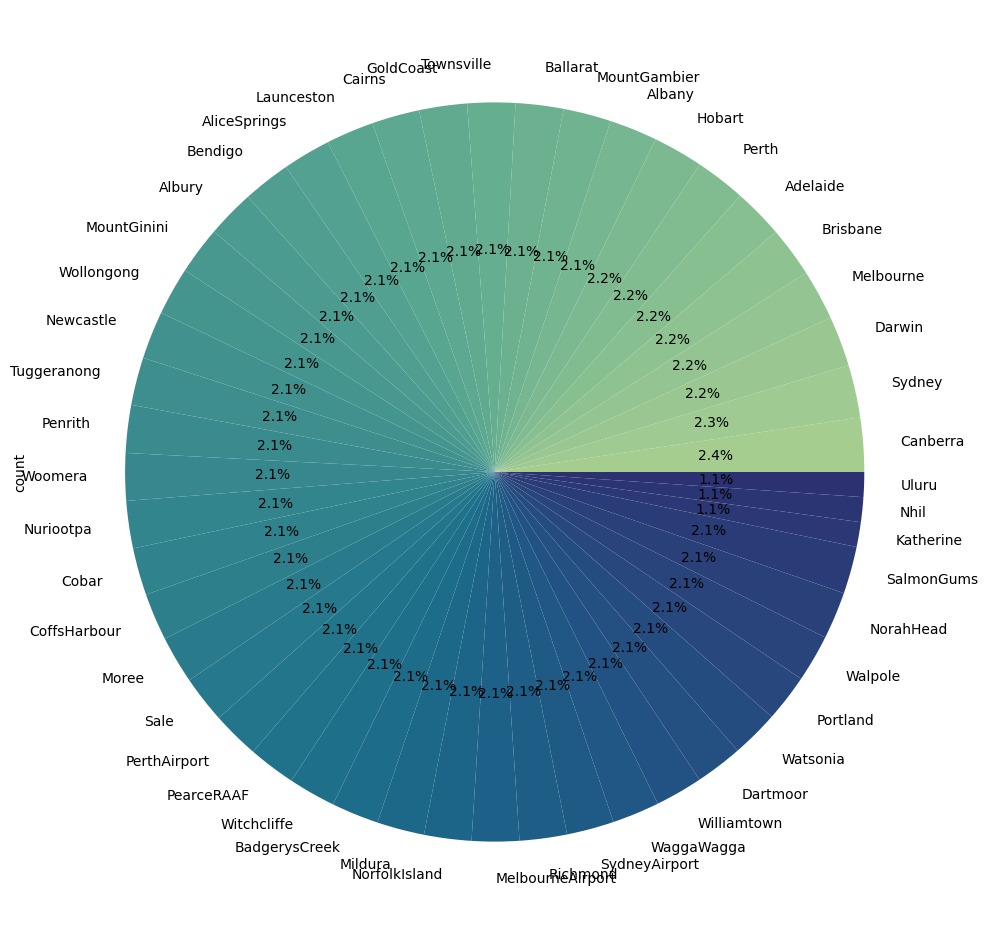

WindGustDir :


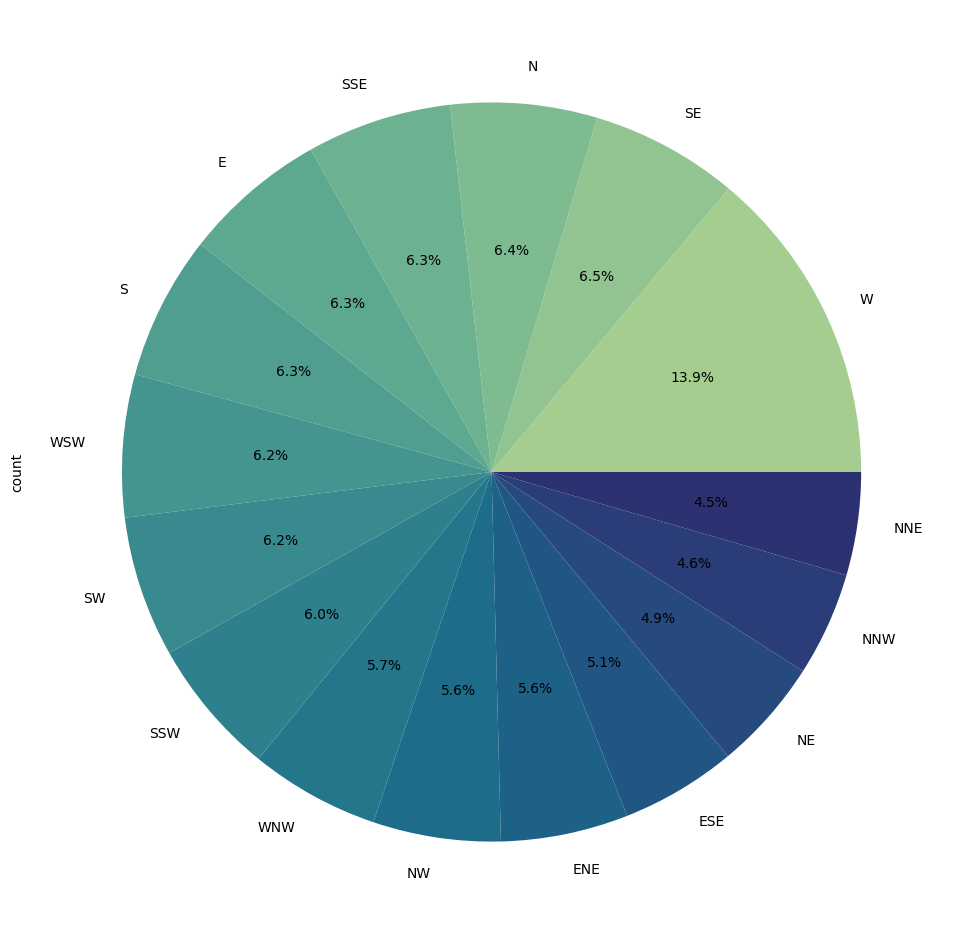

WindDir9am :


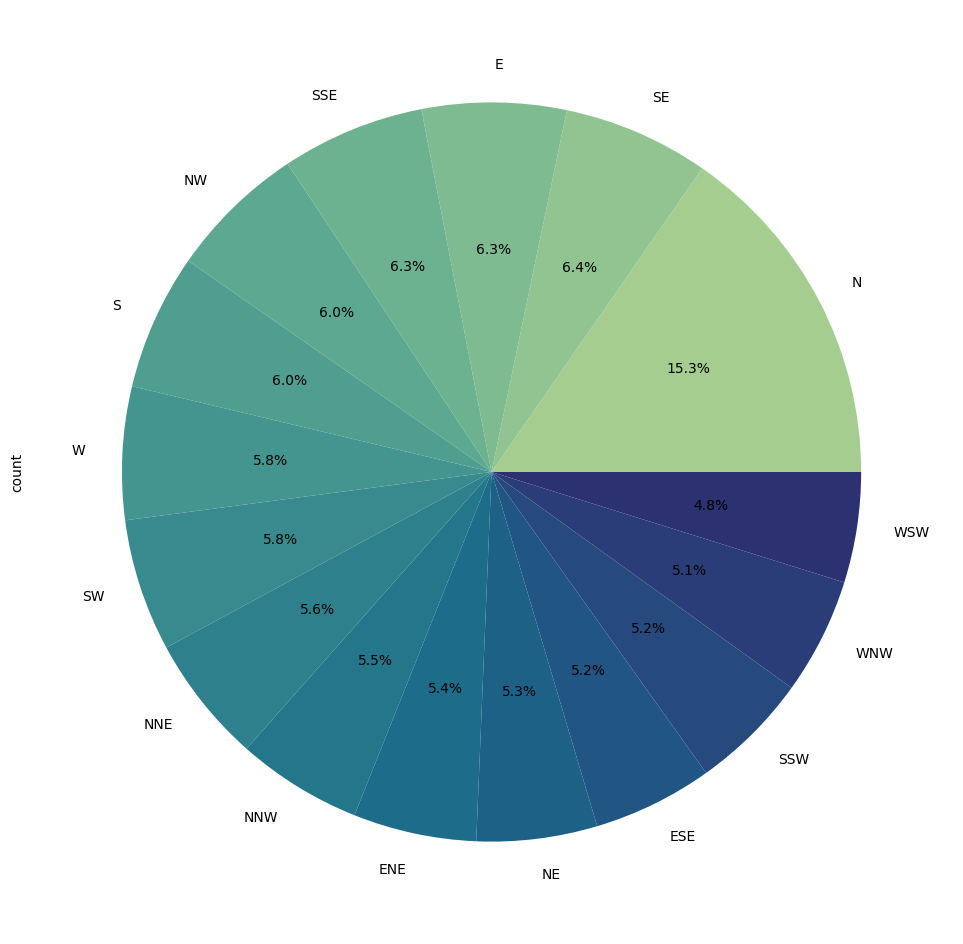

WindDir3pm :


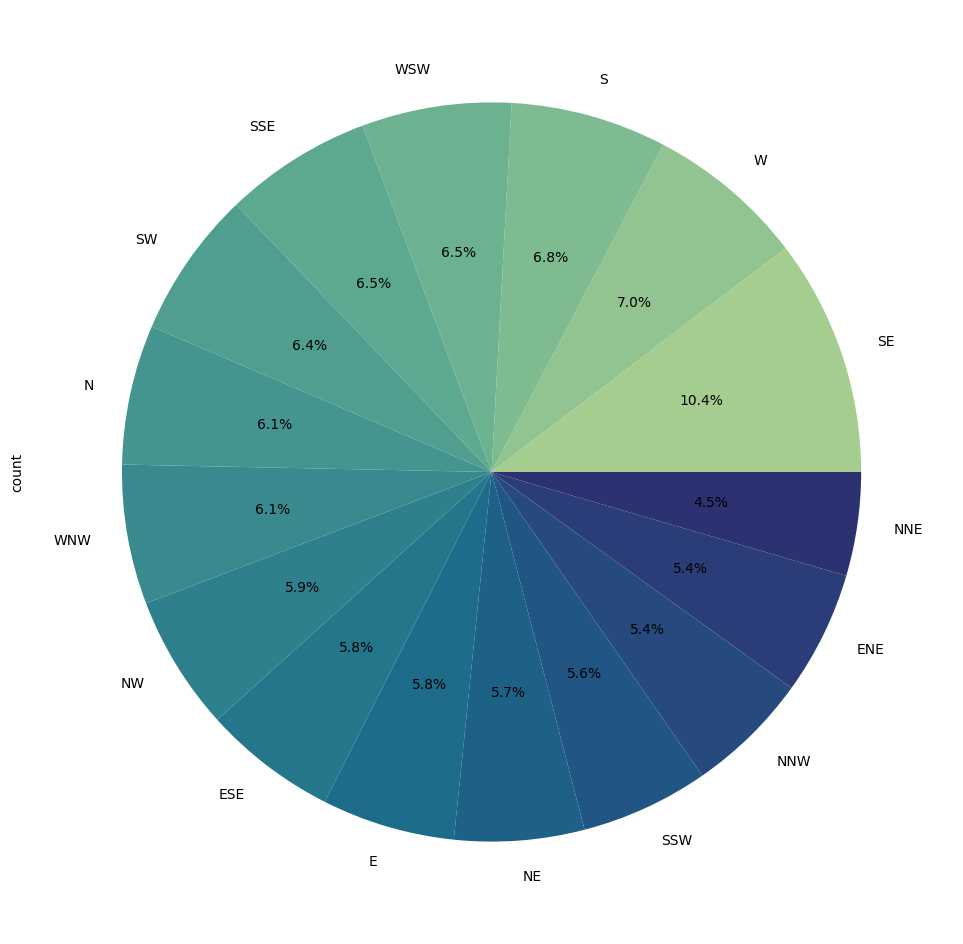

RainToday :


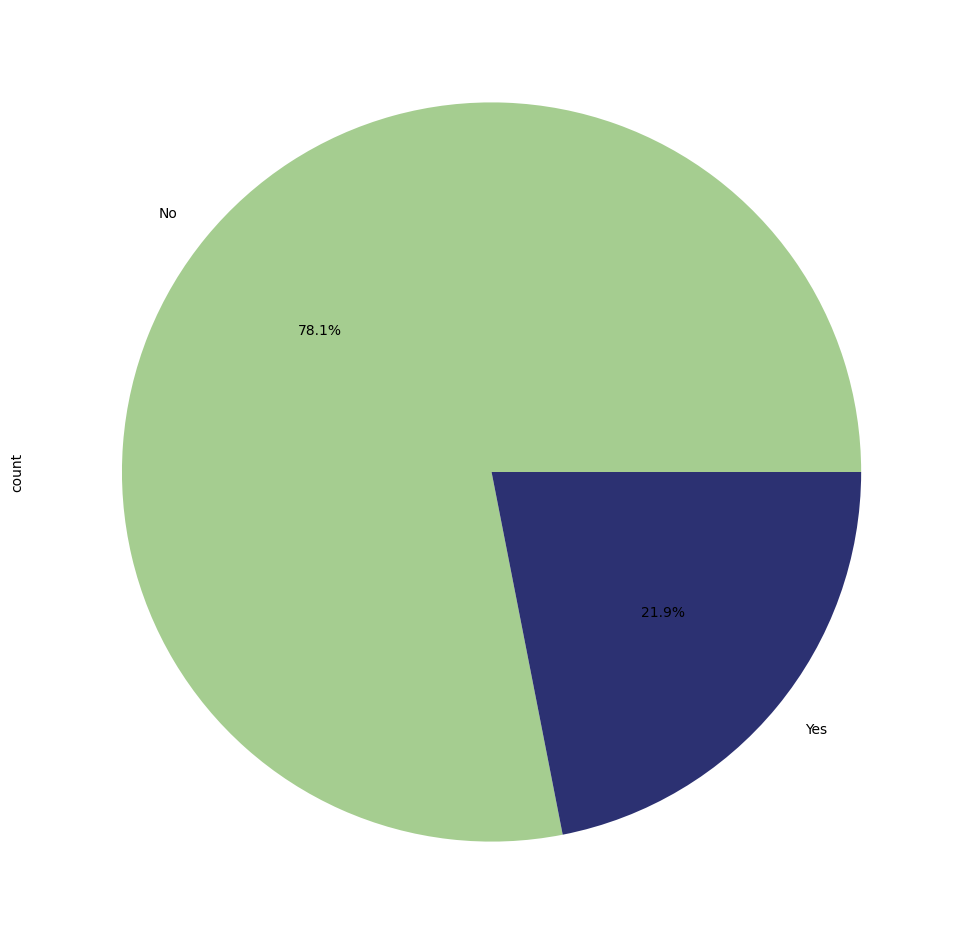

RainTomorrow :


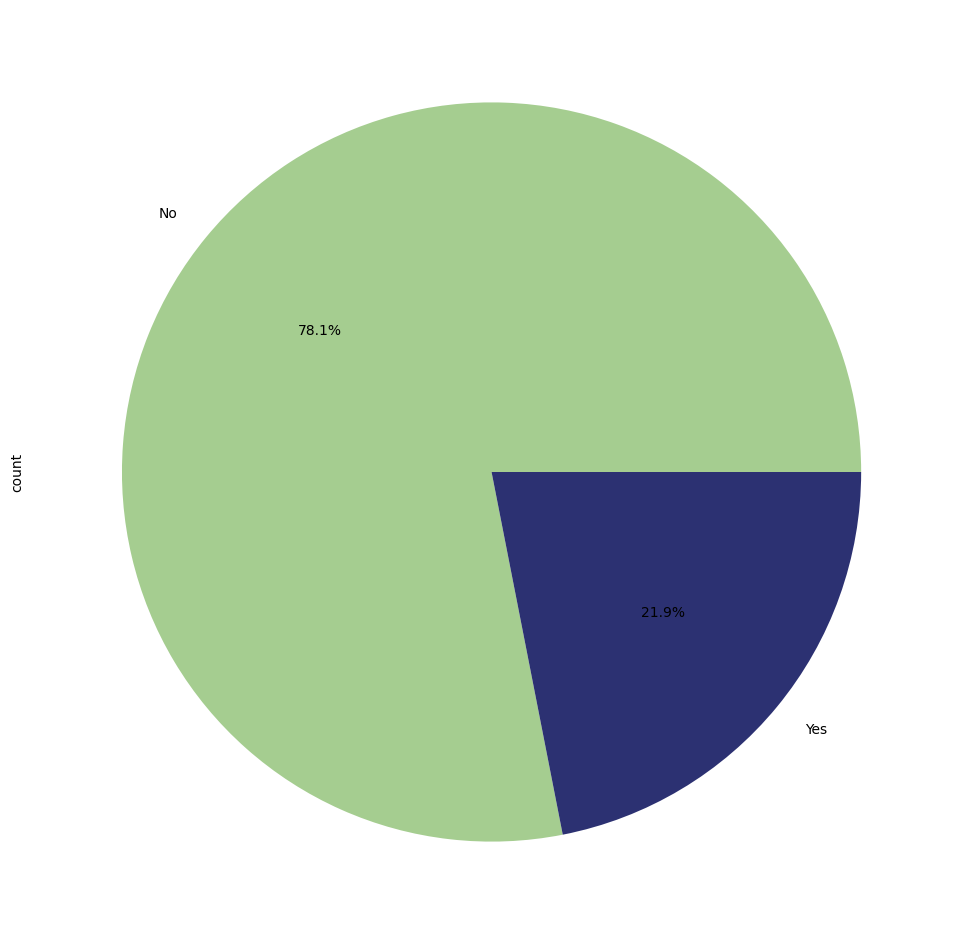

In [17]:
plt.rcParams['figure.figsize'] = 20,12
for col in categoricalDF:      
    print(col,':')
    #categoricalDF[col].value_counts().plot(kind='bar',rot=0, cmap='crest')
    categoricalDF[col].value_counts().plot(kind='pie',autopct='%.1f%%', cmap='crest')
    #plt.xticks(rotation=90)
    plt.show()

**Data Balancing analysis of the Categorical columns**
* *Location* category almost all the locations contribute to the dataset equally. Hence data is balanced
* *Windgustdir* is more from the West direction compared to all the other directions. Hence data is partially balanced
* *Winddir9am* is more from the North direction compared to all the other directions. Hence data is partially balanced
* *Winddir3pm* is more from the South-East direction followed almost equally by West and South directions. Hence data is partially balanced
* Most of the days there was no rain only 22% times of the days, rain occurred. Hence data in *RainToday* and *RainTomorrow* are imbalanced

**Exploring the length of date objects to observe on data balancing on "Date" column**

In [18]:
# Creating different columns based on the date feature, for further usage
df['Year'] = df['Date'].dt.year
df['Month'] = df.Date.dt.month
df['Day'] = df.Date.dt.day

df.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,2008-12-01,Albury,13.4,22.9,0.6,4.8,8.4,W,44.0,W,...,1007.1,8.0,5.0,16.9,21.8,No,No,2008,12,1
1,2008-12-02,Albury,7.4,25.1,0.0,4.8,8.4,WNW,44.0,NNW,...,1007.8,5.0,5.0,17.2,24.3,No,No,2008,12,2
2,2008-12-03,Albury,12.9,25.7,0.0,4.8,8.4,WSW,46.0,W,...,1008.7,5.0,2.0,21.0,23.2,No,No,2008,12,3
3,2008-12-04,Albury,9.2,28.0,0.0,4.8,8.4,NE,24.0,SE,...,1012.8,5.0,5.0,18.1,26.5,No,No,2008,12,4
4,2008-12-05,Albury,17.5,32.3,1.0,4.8,8.4,W,41.0,ENE,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


**Data distribution Of Days Over Year**

Text(0.5, 0, 'Days In Year')

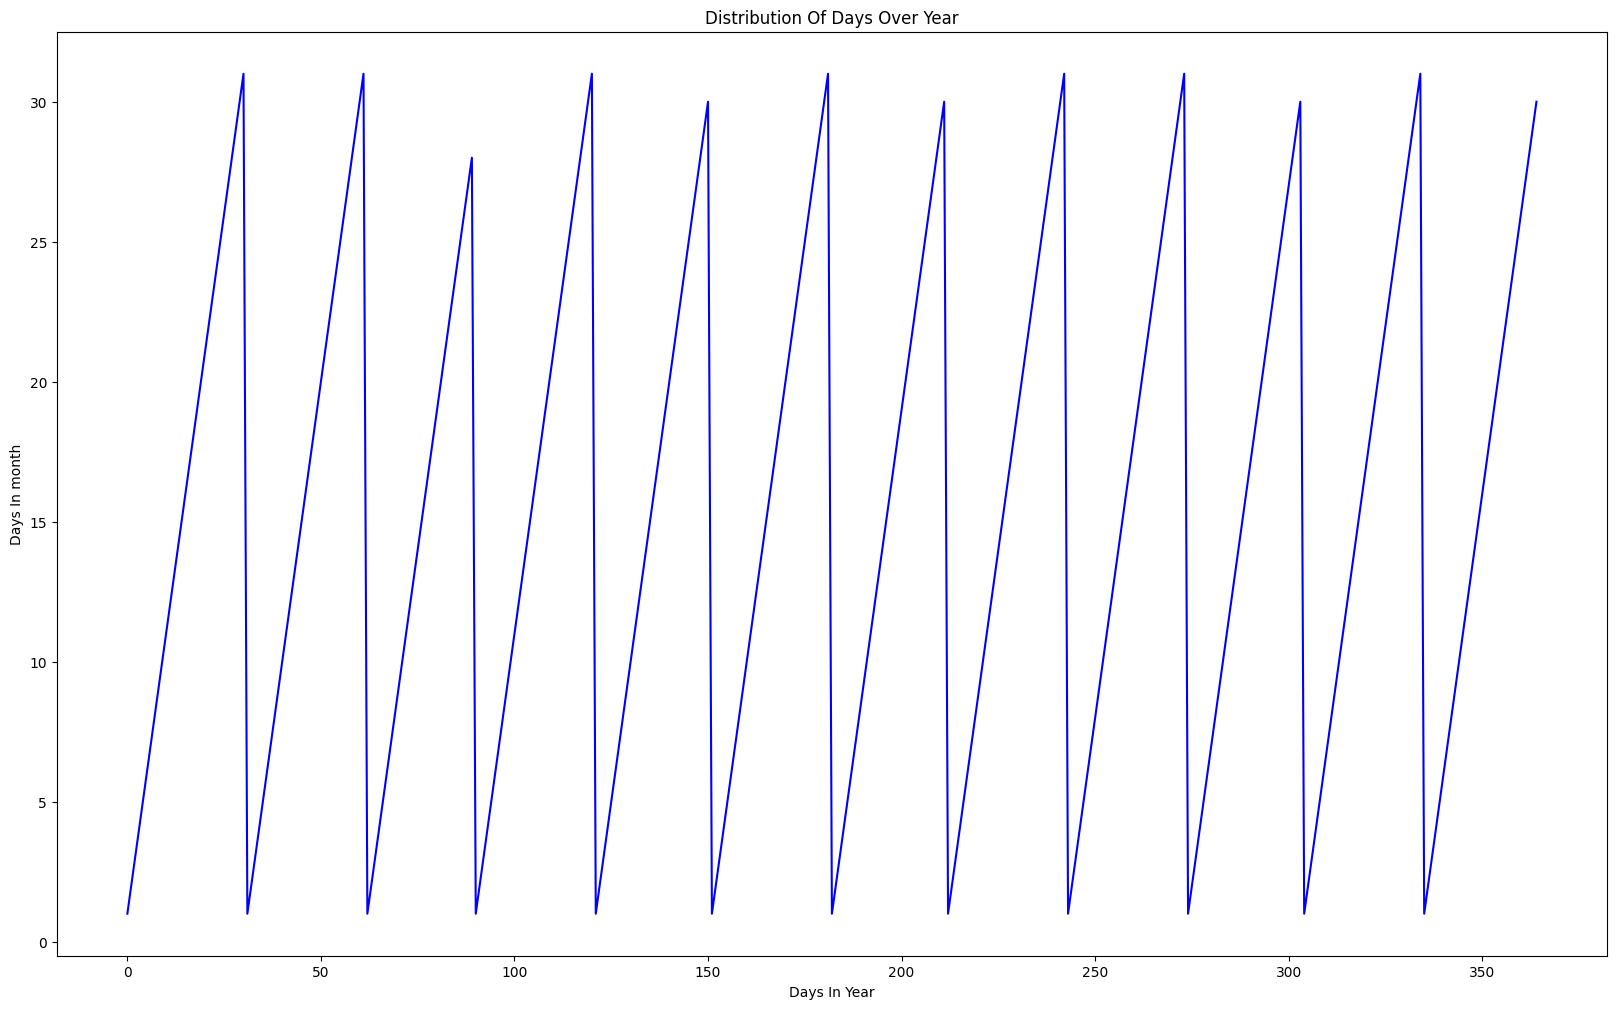

In [19]:
section = df[:365] 
tm = section["Day"].plot(color="Blue")
tm.set_title("Distribution Of Days Over Year")
tm.set_ylabel("Days In month")
tm.set_xlabel("Days In Year")

As per the above distribution, the "Year" data repeats cyclical continuous feature with "Month" data.

# **3. Data Pre-processing and cleaning**

# 3.1. Label encoding columns with categorical data

Apply label encoder to each column with categorical data

In [20]:
label_encoder = LabelEncoder()
# Get list of categorical variables
s = (df.dtypes == "object")
categoricalCols = list(s[s].index)
for i in categoricalCols:
    df[i] = label_encoder.fit_transform(df[i])
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  int32         
 2   MinTemp        145460 non-null  float64       
 3   MaxTemp        145460 non-null  float64       
 4   Rainfall       145460 non-null  float64       
 5   Evaporation    145460 non-null  float64       
 6   Sunshine       145460 non-null  float64       
 7   WindGustDir    145460 non-null  int32         
 8   WindGustSpeed  145460 non-null  float64       
 9   WindDir9am     145460 non-null  int32         
 10  WindDir3pm     145460 non-null  int32         
 11  WindSpeed9am   145460 non-null  float64       
 12  WindSpeed3pm   145460 non-null  float64       
 13  Humidity9am    145460 non-null  float64       
 14  Humidity3pm    145460 non-null  float64       
 15  

In [21]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,2008-12-01,2,13.4,22.9,0.6,4.8,8.4,13,44.0,13,...,1007.1,8.0,5.0,16.9,21.8,0,0,2008,12,1
1,2008-12-02,2,7.4,25.1,0.0,4.8,8.4,14,44.0,6,...,1007.8,5.0,5.0,17.2,24.3,0,0,2008,12,2
2,2008-12-03,2,12.9,25.7,0.0,4.8,8.4,15,46.0,13,...,1008.7,5.0,2.0,21.0,23.2,0,0,2008,12,3
3,2008-12-04,2,9.2,28.0,0.0,4.8,8.4,4,24.0,9,...,1012.8,5.0,5.0,18.1,26.5,0,0,2008,12,4
4,2008-12-05,2,17.5,32.3,1.0,4.8,8.4,13,41.0,1,...,1006.0,7.0,8.0,17.8,29.7,0,0,2008,12,5


encoding the categorical features into numeric values to normalize labels.
This data is used on the training data so that we can scale the training data and also learn the scaling parameters.

# 3.2. Perform the scaling of the features

Scaling the train and test data seperately so as the model will not be biased towards values

In [22]:
#Identifying feature columns
features = df.drop(['RainTomorrow', 'Date', 'Day', 'Month'], axis=1)

#Identifying the target column
target = df['RainTomorrow']

#Set up a standard scaler for the features
col_names = list(features.columns)
s_scaler = preprocessing.StandardScaler()
features = s_scaler.fit_transform(features)
features = pd.DataFrame(features, columns=col_names) 
outliers = features.describe().T
outliers

,count,mean,std,min,25%,50%,75%,max
Location,145460.0,7.815677e-18,1.000003,-1.672228,-0.899139,0.014511,0.857881,1.701250
MinTemp,145460.0,-4.501830e-16,1.000003,-3.250525,-0.705659,-0.030170,0.723865,3.410112
MaxTemp,145460.0,3.001220e-16,1.000003,-3.952405,-0.735852,-0.086898,0.703133,3.510563
Rainfall,145460.0,7.815677e-18,1.000003,-0.275097,-0.275097,-0.275097,-0.203581,43.945571
Evaporation,145460.0,-3.282584e-17,1.000003,-1.629472,-0.371139,-0.119472,0.006361,43.985108
Sunshine,145460.0,-5.424080e-16,1.000003,-2.897217,0.076188,0.148710,0.257494,2.360634
WindGustDir,145460.0,6.252542e-18,1.000003,-1.724209,-0.872075,0.193094,1.045228,1.471296
WindGustSpeed,145460.0,1.824961e-16,1.000003,-2.588407,-0.683048,-0.073333,0.460168,7.243246
WindDir9am,145460.0,7.190423e-17,1.000003,-1.550000,-0.885669,0.000105,0.885879,1.771653
WindDir3pm,145460.0,8.284618e-17,1.000003,-1.718521,-0.837098,0.044324,0.925747,1.586813


Removes the mean and scales each feature/variable to unit variance

# 3.3. Detecting outliers

Box plots are a visual method to identify outliers

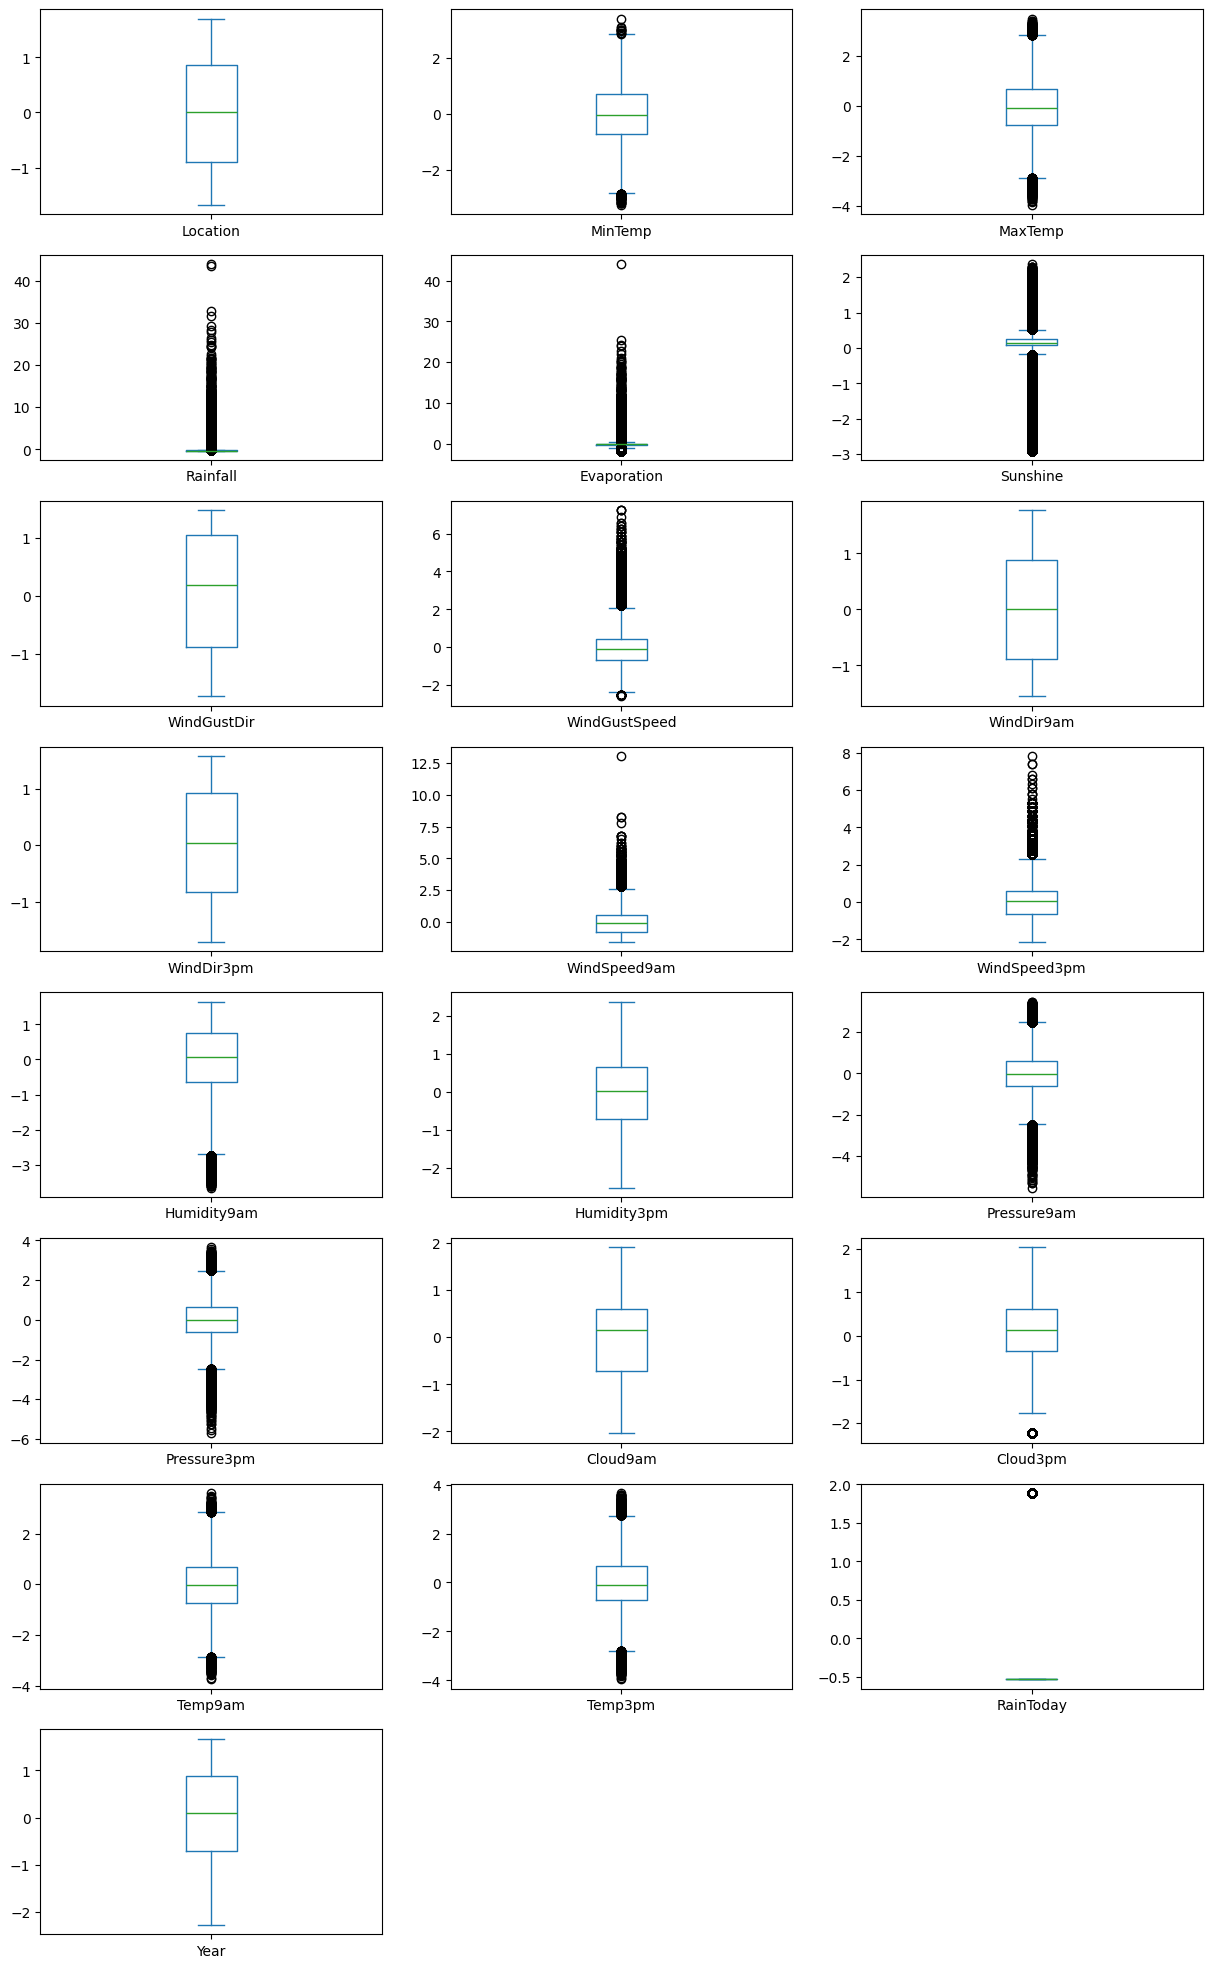

In [23]:
features.plot(kind="box",subplots=True,layout=(8, 3), figsize=(15,25));
plt.show()

**Finding the Boundary Values**

In [25]:
def outlier_treatment(outliersDF, col):
  Q1 = outliersDF.loc[col, '25%']
  Q3 = outliersDF.loc[col, '75%']
  IQR = Q3 - Q1
  lower_range = Q1 - (1.5 * IQR)
  upper_range = Q3 + (1.5 * IQR)
  return lower_range,upper_range

t = (df.dtypes == "float64")
neumericCols = list(t[t].index)
for column  in neumericCols:
  lowerbound,upperbound = outlier_treatment(outliers, column)
  print(f"Highest allowed {column}:",lowerbound)
  print(f"Lowest allowed {column}:",upperbound)
    

Highest allowed MinTemp: -2.8499440059648107
Lowest allowed MinTemp: 2.868149698260242
Highest allowed MaxTemp: -2.8943279728027815
Lowest allowed MaxTemp: 2.8616089204898083
Highest allowed Rainfall: -0.3823704928131747
Lowest allowed Rainfall: -0.09630687269478103
Highest allowed Evaporation: -0.9373888466128506
Lowest allowed Evaporation: 0.5726110491414169
Highest allowed Sunshine: -0.1957694856399862
Lowest allowed Sunshine: 0.5294513313026543
Highest allowed WindGustSpeed: -2.3978707455985018
Lowest allowed WindGustSpeed: 2.174991146219351
Highest allowed WindSpeed9am: -2.8245782577444603
Lowest allowed WindSpeed9am: 2.5919495115722695
Highest allowed WindSpeed3pm: -2.5433701614176725
Lowest allowed WindSpeed3pm: 2.5044200335213347
Highest allowed Humidity9am: -2.699573269266537
Lowest allowed Humidity9am: 2.816118651224647
Highest allowed Humidity3pm: -2.7625732411449544
Lowest allowed Humidity3pm: 2.7085076173278413
Highest allowed Pressure9am: -2.466354167751295
Lowest allowed

* IQR method is used by box plot to highlight outliers, which is the difference between q3 (75th percentile) and q1 (25th percentile)
* The IQR method computes lower bound and upper bound to identify outliers.

* Lower Bound = q1–1.5*IQR
* Upper Bound = q3+1.5*IQR

* *Rainfall*, *Evaporation*, *Sunshine* are having less different in loer and upper bount, hence taking the mean value

# 4.4. Dropping the outliers based on data analysis

In [26]:
features["RainTomorrow"] = target

In [27]:
features = features[(features["MinTemp"]<2.0)&(features["MinTemp"]>-2.0)]
features = features[(features["MaxTemp"]<2.0)&(features["MaxTemp"]>-1.8)]
features = features[(features["Rainfall"]<2.5)]
features = features[(features["Evaporation"]<2.3)]
features = features[(features["Sunshine"]<2.1)]
features = features[(features["WindGustSpeed"]<2.3)&(features["WindGustSpeed"]>-2.4)]
features = features[(features["WindSpeed9am"]<2.3)&(features["WindSpeed9am"]>-2.2)]
features = features[(features["WindSpeed3pm"]<2.5)&(features["WindSpeed3pm"]>-2.6)]
features = features[(features["Humidity9am"]<2.8)&(features["Humidity9am"]>-2.2)]
features = features[(features["Humidity3pm"]<2.2)&(features["Humidity3pm"]>-2.0)]
features = features[(features["Pressure9am"]< 2.0)&(features["Pressure9am"]>-2.2)]
features = features[(features["Pressure3pm"]< 2.0)&(features["Pressure3pm"]>-2.2)]
features = features[(features["Cloud9am"]<1.8)&(features["Cloud9am"]>-1.7)]
features = features[(features["Cloud3pm"]<2)&(features["Cloud3pm"]>-2.0)]
features = features[(features["Temp9am"]<2.0)&(features["Temp9am"]>-2.0)]
features = features[(features["Temp3pm"]<2.0)&(features["Temp3pm"]>-1.7)]


features.shape

(104721, 23)

Dropped the outliers based on above data analysis using IQR

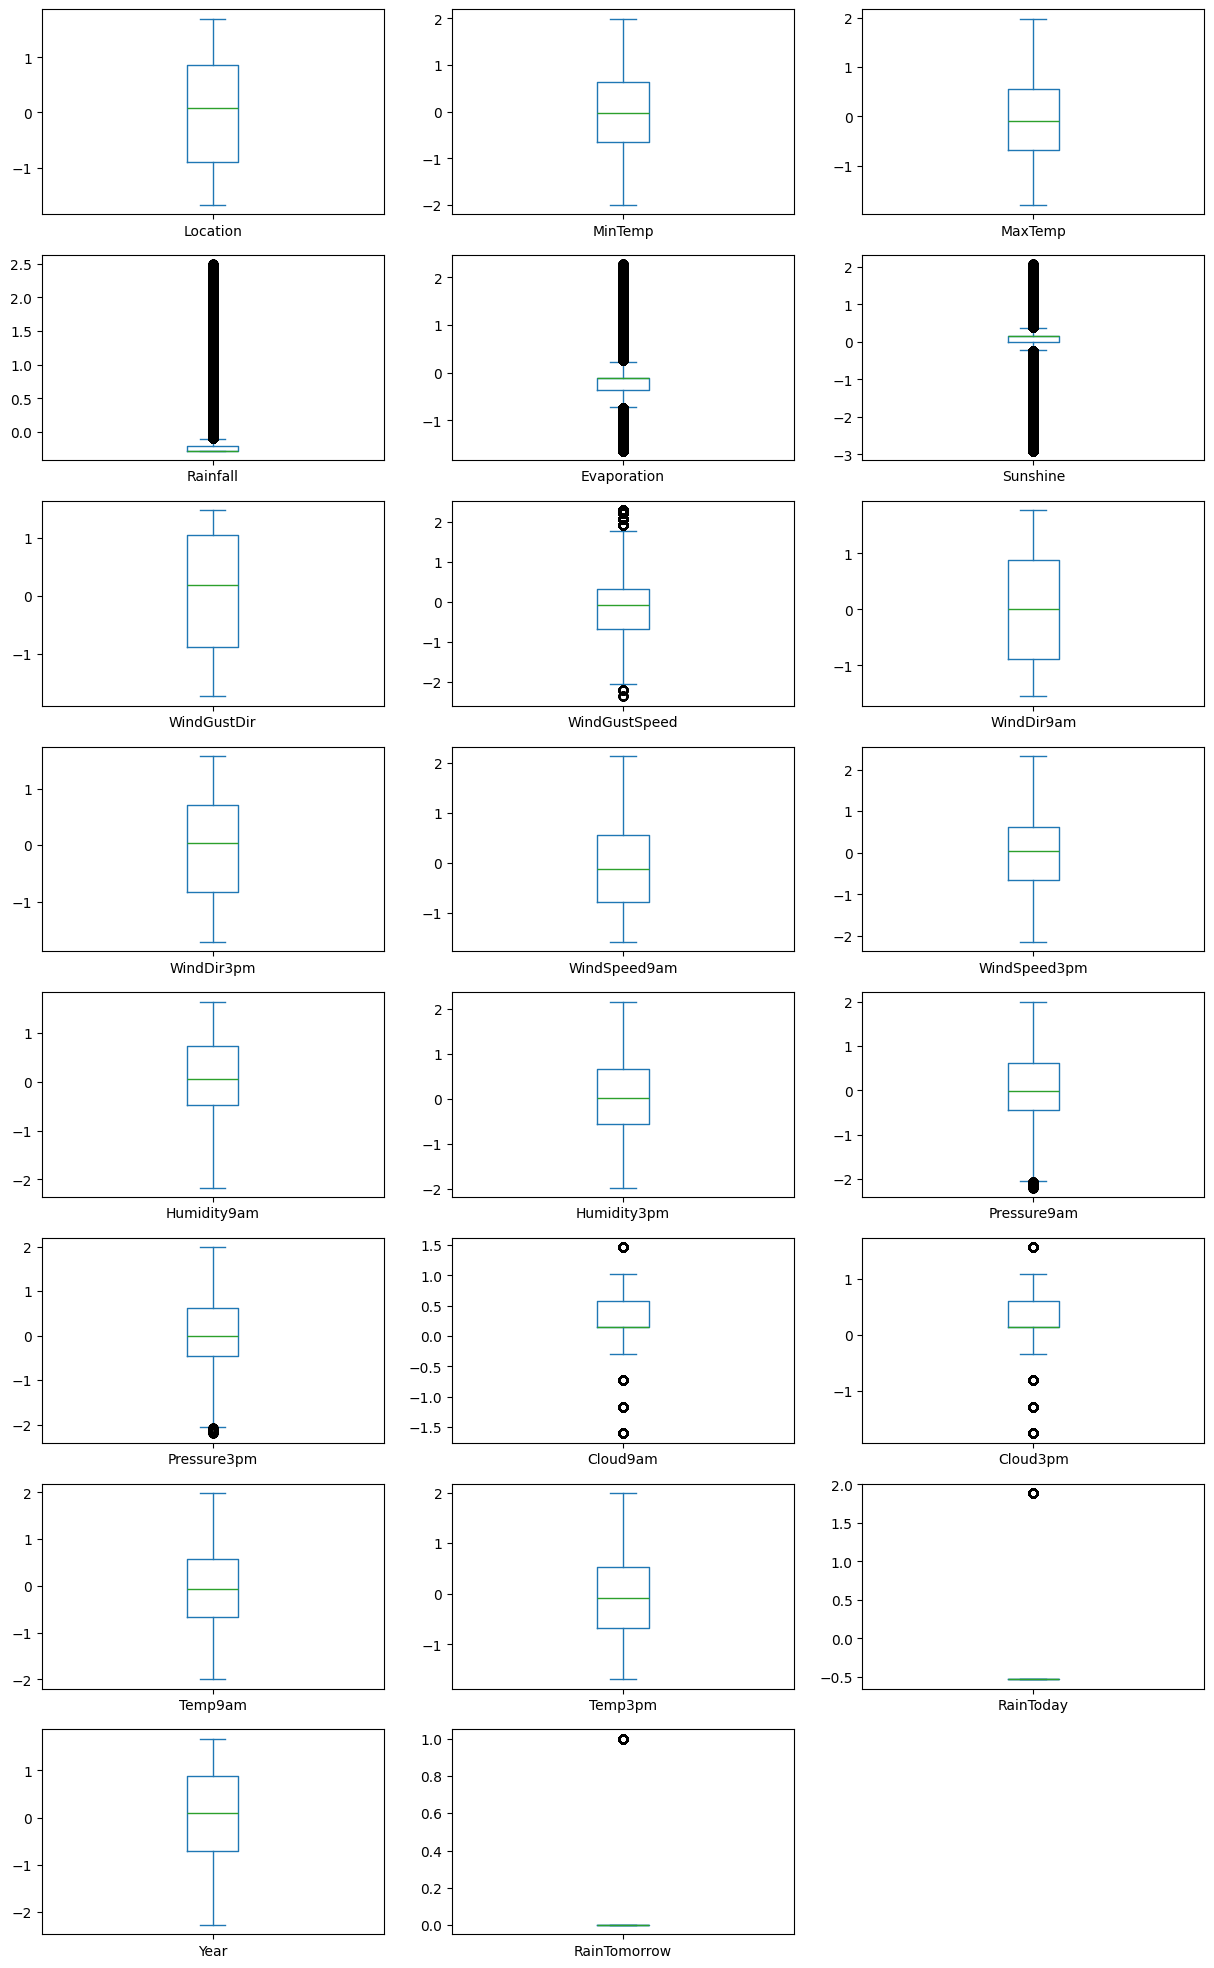

In [28]:
features.plot(kind="box",subplots=True,layout=(8, 3), figsize=(15,25));
plt.show()

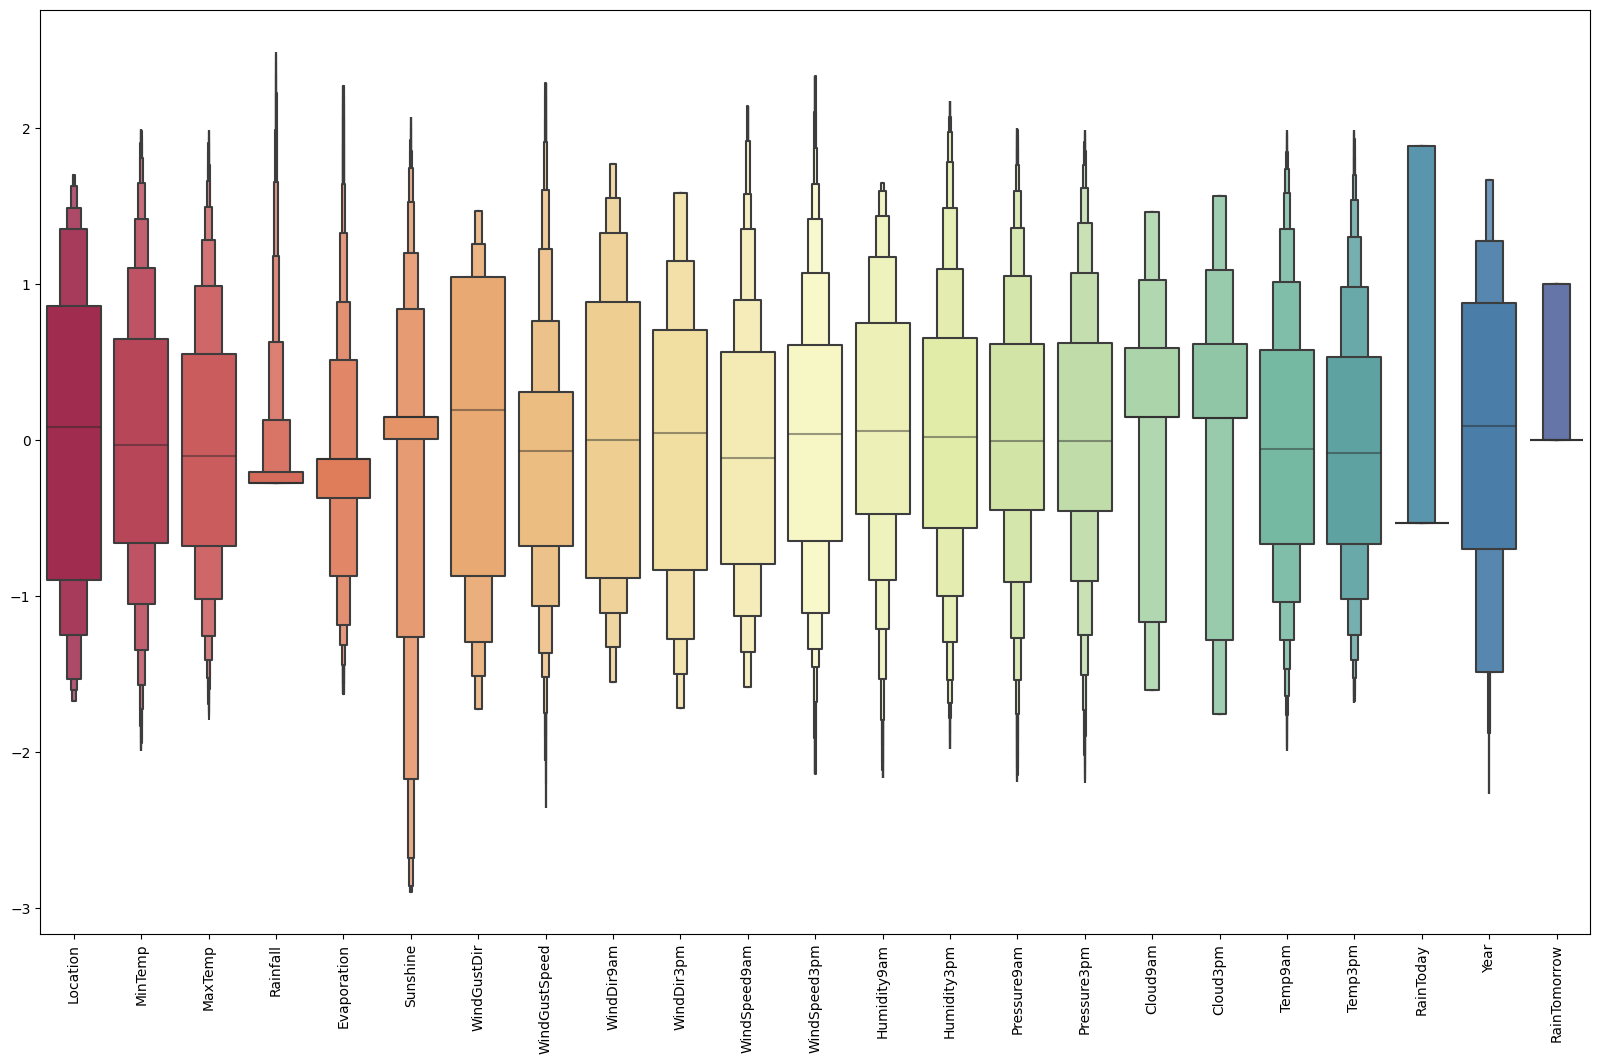

In [24]:
#looking at the scaled features without outliers

plt.figure(figsize=(20,12))
sns.boxenplot(data = features,palette = "Spectral")
plt.xticks(rotation=90)
plt.show()

After removing all outliers, the scaled features are looking good

# **4. Model Building**

# 4.1. Split the dataset into training and test sets.



**Get X and Y feature variables**

Assigning x and y variable in which the x feature variable has *independent* variables and the y feature variable has a *dependent* variable

In [29]:
x = features.drop(["RainTomorrow"], axis=1)
y = features["RainTomorrow"]

x.shape

(104721, 22)

In [30]:
y.shape

(104721,)

The shape of the above x dataframe is (104721, 22). The features columns are taken in the X variable and the outcome column is taken in the y variable. X and y variables are passed in the train_test_split() method to split the data frame into train and test sets.

We are going to split the dataset with different ratios of 20% and 30%  test data

**Case 1** : Train = 80 % Test = 20% [ x_train,y_train] = 80% ;
[ x_test,y_test] = 20% ;

In [31]:
# Splitting test and training sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42, stratify=y)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(83776, 22) (20945, 22) (83776,) (20945,)


**Case 2** : Train = 70 % Test = 30% [ x_train1,y_train1] = 70% ; [ x_test1,y_test1] = 30% ;

In [32]:
# Splitting test and training sets
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, test_size = 0.3, random_state = 64, stratify=y)

print(x_train1.shape, x_test1.shape, y_train1.shape, y_test1.shape)

(73304, 22) (31417, 22) (73304,) (31417,)


# 4.2.a. Develop ANN Model

Create a Sequential model for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

We have created one input layer, three hidden layer with two dropout and one output layer to train our data.

* The input layer start with 24 dimensions and 32 neuron units of hidden layer with relu activation function
* The next hidden layer have 32 neurons plus relu activation function and take the previous 32 dimensions as input
* The next hidden layer have 16 neurons plus relu activation function and take the previous 32 dimensions as input
* To reduce overfitting *Dropout* of 20% of the neurons to regularize ANN
* The next hidden layer have 8 neurons plus relu activation function and take the previous 16 dimensions as input
* To reduce overfitting *Dropout* of 40% of the neurons to regularize ANN
* The output layer has one node and uses the sigmoid activation function.



In [33]:
model = Sequential()
model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu', input_dim = 22))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.35))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.50))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

model.summary()

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1472      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dropout_2 (Dropout)         (None, 8)                 

* The *Dense* function in Keras constructs a fully connected neural network layer, automatically initializing the weights as biases
* We have added the LR model has the form y=f(xW) where f is the sigmoid function
* The Output layer being directly connected to the input reflects this function
* The *compile* function creates the neural network model by specifying the details of the learning process. The model hasn’t been trained yet
* *Adam* optimizer computes individual learning rates for different parameters
* *Adam* uses estimations of first and second moments of gradient to adapt the learning rate for each weight of the neural network
* We are using a binary 0/1 classifier, the loss function to minimize is *binary_crossentropy*

# 4.2.b. Train the model and print the training accuracy and loss values

Create a callback to specify the performance measure to monitor, the trigger, and once triggered, it will stop the training process.

In [ ]:
earlyStoppingCallbacks  = callbacks.EarlyStopping(
    # "no longer improving" being defined as "no better than 1e-2 less"
    min_delta = 0.0001, 
    # "no longer improving" being further defined as "for at least 5 epochs"
    patience=5,
    #Restore model weights from the epoch with the best value of the monitored quantity 
    restore_best_weights=True,
)

Using fit(), train the model by slicing the data into "*batches*" of size batch_size, and repeatedly iterating over the entire dataset for a given number of *epochs*.
* Using *EarlyStopping*, stop training when training is no longer improving the validation metrics
* This callback will stop the training when there is no improvement in the loss for 5 consecutive epochs

In [ ]:
history = model.fit(x_train, y_train, batch_size = 64, epochs = 5, callbacks=[earlyStoppingCallbacks], validation_split=0.2)

In [ ]:
print(history.history)

In [ ]:
history1 = model.fit(x_train1, y_train1, batch_size = 64, epochs = 5, callbacks=[earlyStoppingCallbacks], validation_split=0.3)
print(history1.history)

**A plot of accuracy on the training and validation datasets over training epochs**

In [ ]:
plt.figure(figsize=(10,5))

plt.plot(history.history['accuracy'], "#BDE2E2", label='Training accuracy')
plt.plot(history.history['val_accuracy'], "#C2C4E2", label='Validation accuracy')

plt.title('Model Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc="best")
plt.show()

From the above plot of the accuracy, we can see that the model could probably be trained a little more as the trend for accuracy on both datasets is still rising for the last few epochs. we can also see that the model has not yet over-learned the training dataset, showing comparable skill on both datasets.

In [ ]:
plt.figure(figsize=(10,5))

plt.plot(history1.history['accuracy'], "#BDE2E2", label='Training accuracy')
plt.plot(history1.history['val_accuracy'], "#C2C4E2", label='Validation accuracy')

plt.title('Model Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc="best")
plt.show()

From the above plot of the accuracy, there is the trend for accuracy on both datasets is still falling for the last few epochs.

**A plot of loss on the training and validation datasets over training epochs**

In [ ]:
plt.figure(figsize=(10,5))

plt.plot(history.history['loss'], "#BDE2E2", label='Training loss')
plt.plot(history.history['val_loss'],"#C2C4E2", label='Validation loss')

plt.title('Model Training and validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")
plt.show()

From the above plot of the loss, you can see that the model has comparable performance on both train and validation datasets. If these parallel plots start to depart consistently, it might be a sign to stop training at an earlier epoch.

In [ ]:
plt.figure(figsize=(10,5))

plt.plot(history1.history['loss'], "#BDE2E2", label='Training loss')
plt.plot(history1.history['val_loss'],"#C2C4E2", label='Validation loss')

plt.title('Model Training and validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")
plt.show()

From the above plot of the loss, you can see that the model has comparable performance on both train and validation datasets. If these parallel plots start to depart consistently, it might be a sign to stop training at an earlier epoch.

# **5. Performance Evaluation**

**Evaluating the Performance of our two models**

In [ ]:
#Evaluate model on test data
scores = model.evaluate(x_test, y_test, batch_size=128)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

scores1 = model.evaluate(x_test1, y_test1, batch_size=128)
print("%s: %.2f%%" % (model.metrics_names[1], scores1[1]*100))

Both Splits (20% and 30%  test data) gives the same accuracy. Hence we will be chossing the first model (20%  test data) for further performance evaluation

# 5.1. Confusion matrix

**A prediction model is trained with a set of training sequences. Once trained, the model is used to perform sequence predictions.**

* Given a sequence of observations about the weather over time, predict the expected weather tomorrow.

In [ ]:
x_test = np.nan_to_num(x_test)
y_test = np.nan_to_num(y_test)

# Predicting the test set results
predicted = model.predict(x_test)
y_pred = (predicted > 0.5)
print("x=%s, Predicted=%s" % (x_test[0], y_pred))

Confusion matrix measures the quality of predictions from a classification model by looking at how many predictions are True and how many are False.

In [ ]:
# confusion matrix
cfm = confusion_matrix(y_test, y_pred)
cfm


In [ ]:
plt.subplots(figsize=(12,8))
sns.heatmap(cfm/np.sum(cfm),cmap="crest", annot = True, annot_kws = {'size':15})

* Top left quadrant = True Positives = 76% RainTomorrow as TP
* Bottom right quadrant = True Negatives = 3.6% RainTomorrow as TN
* Top right quadrant = False Positives = 12% RainTomorrow as FP
* Bottom left quadrant = False Negatives = 8.9% RainTomorrow as FN

With data from the confusion matrix, we can interpret the results by looking at the classification report.

In [ ]:
print(classification_report(y_test, y_pred))

**Precision**: The precision tells us the *accuracy* of positive predictions.
As per the above precision, the positive prediciton is more than 83%

**Recall**: The fraction of correctly identified positive predictions.

**f1-score**: Measures precision and recall at the same time by finding the harmonic mean of the two values.

**Support**: The support is the number of occurrences of each class in your y_test

